# INFSCI 2415 Information Visualization
------
> * Midterm Report
> * Siheng Ning - sin21 
> * 10.18.2022

**daily_citi_bike_trip_counts_and_weather.csv includes information about the daily bike trips y taken with the NYC’s City Bike system. The data frame includes also information about the weather during each day. I will build a model that will predict the number of daily bike trips based on the maximum temperature during the day and the number of the day of the week (variable: dow) and the month of the year.**

In [1]:
import numpy as np
import pandas as pd
%matplotlib widget

df = pd.DataFrame(pd.read_csv("./daily_citi_bike_trip_counts_and_weather.csv"))
df.head()

date  trips  precipitation  snow_depth  snowfall  max_temperature  \
0  2013-07-01  16650       0.838583         0.0       0.0            77.00   
1  2013-07-02  22745       0.078740         0.0       0.0            82.04   
2  2013-07-03  21864       0.531496         0.0       0.0            82.94   
3  2013-07-04  22326       0.000000         0.0       0.0            87.08   
4  2013-07-05  21842       0.000000         0.0       0.0            89.96   

   min_temperature  average_wind_speed  dow  year  month  holiday  \
0            71.96             3.13171    1  2013      7    False   
1            71.96             2.68432    2  2013      7    False   
2            73.04             4.25018    3  2013      7    False   
3            75.02             4.25018    4  2013      7     True   
4            75.92             4.92126    5  2013      7    False   

   stations_in_service  weekday  weekday_non_holiday  
0                  NaN     True                 True  
1                  NaN     True                 True  
2                  NaN     True                 True  
3                  NaN     True                False  
4                  NaN     True                 True

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = df.max_temperature.values.reshape(-1, 1)
y = df.trips.values

N = [x for x in range(10)]

def get_model_score(result):
    poly_regression, X_poly_features, _ = result
    return poly_regression.score(X_poly_features, y)


def linear_regression(n):
    poly = PolynomialFeatures(degree=n)
    X_poly_features = poly.fit_transform(X)
    poly.fit(X_poly_features, y)
    lin = LinearRegression()
    lin.fit(X_poly_features, y)
    return [lin, X_poly_features, lin.predict(X_poly_features)]


linear_regression_result = [linear_regression(n) for n in N]

R2_scores = [get_model_score(r) for r in linear_regression_result]
N_best = N[R2_scores.index(max(R2_scores))]

**Data visualisation.**
The first figure shows that 10 different model predict the **number of trips** correspond to the **dayly highest temperature**.

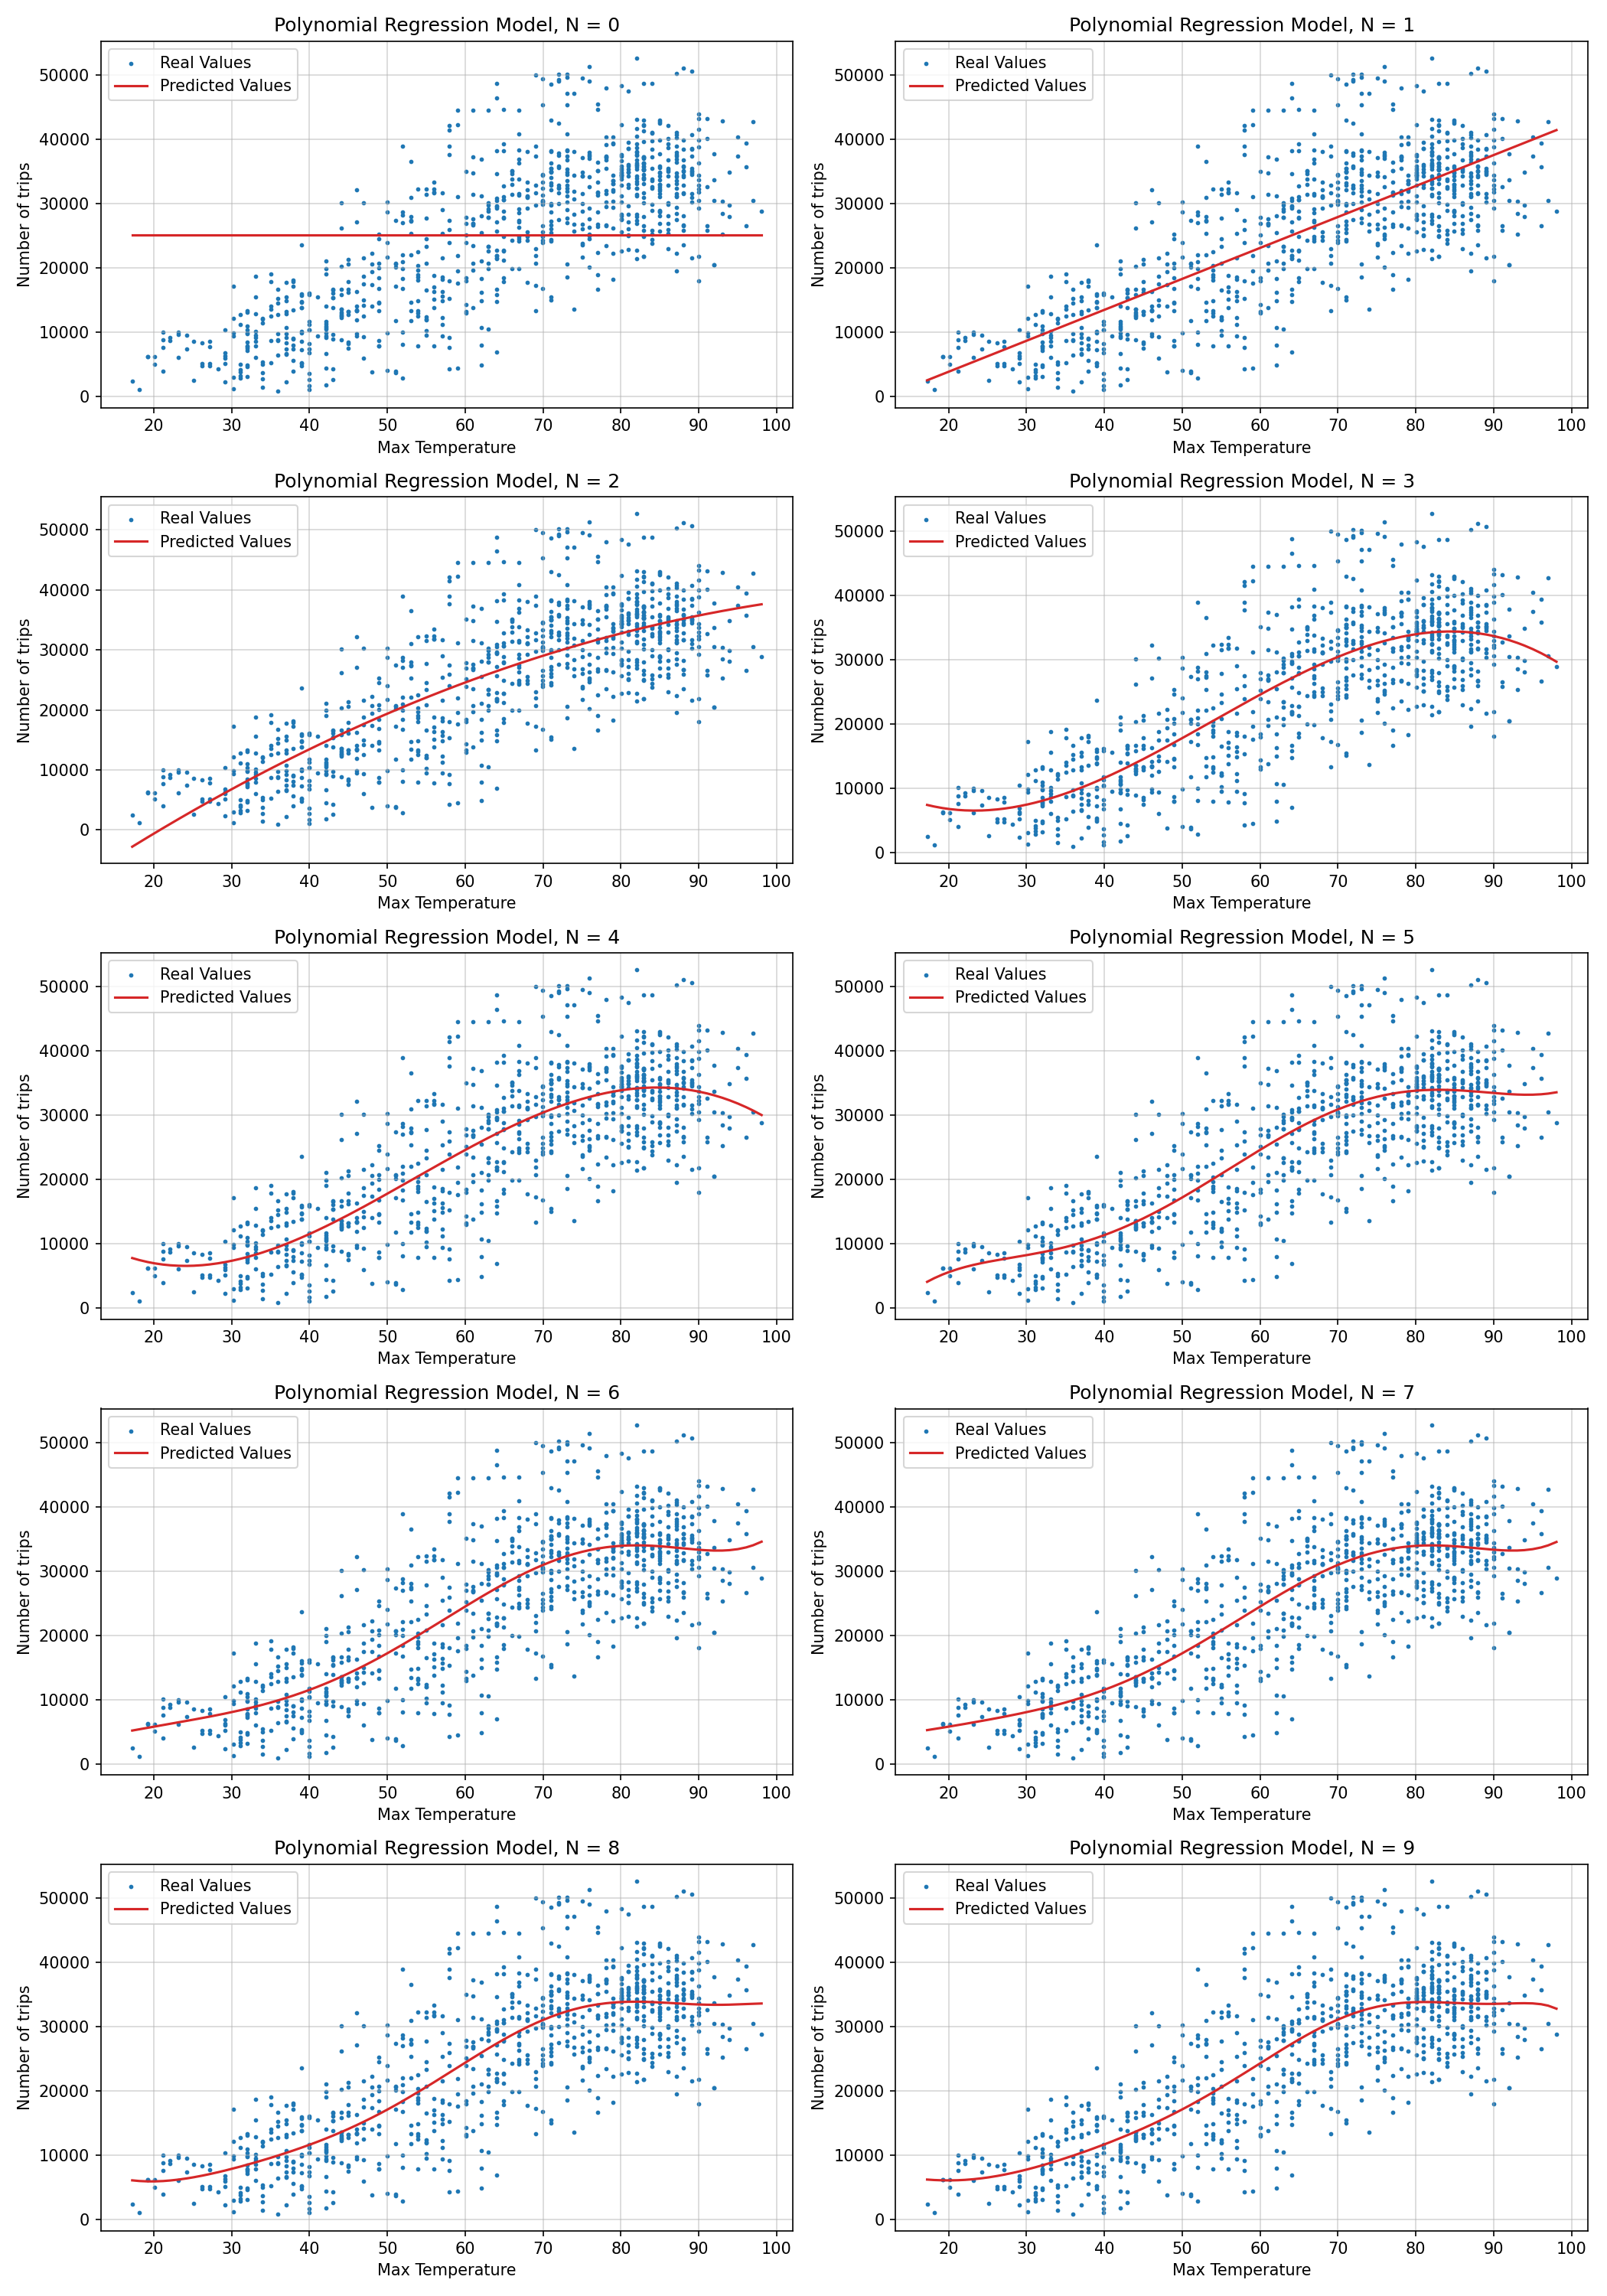

In [3]:
from matplotlib import matplotlib_fname, pyplot as plt2

fig = plt2.figure(figsize=(14, 20), dpi=150)
for n in N:
    ax = fig.add_subplot(int(len(N)/2), 2, n + 1)
    poly_regression, X_poly_features, y_pred = linear_regression_result[n]
    temp_df = pd.DataFrame({
        "x": df.max_temperature.values,
        "y_pred": y_pred
    })
    temp_df = temp_df.sort_values(by="x")
    plt2.scatter(X, y, color='#1f77b4', s = 3,  label='Real Values')
    plt2.plot(temp_df.x.values, temp_df.y_pred.values, '#d62728', label='Predicted Values')
    plt2.grid(alpha=0.5)
    plt2.legend()
    plt2.xlabel('Max Temperature')
    plt2.ylabel('Number of trips')
    plt2.title('Polynomial Regression Model, N = ' + str(n))
plt2.tight_layout()
plt2.show()


The legends is on the left corners. The blue dots represent the **dayly highest temperature** correspond to the number of trips. The line represent predicted **number of trips** under different **daily highest temperature**. 

### The relationship between the trips, the day of the week (variable: dow) and the month of the year. 

In [4]:
from statsmodels.formula.api import ols

df["dow"] = df["dow"].apply(lambda x: 7 if (x == 0) else x)

In [5]:
model = ols("trips ~ C(dow) + C(month)", data=df).fit()

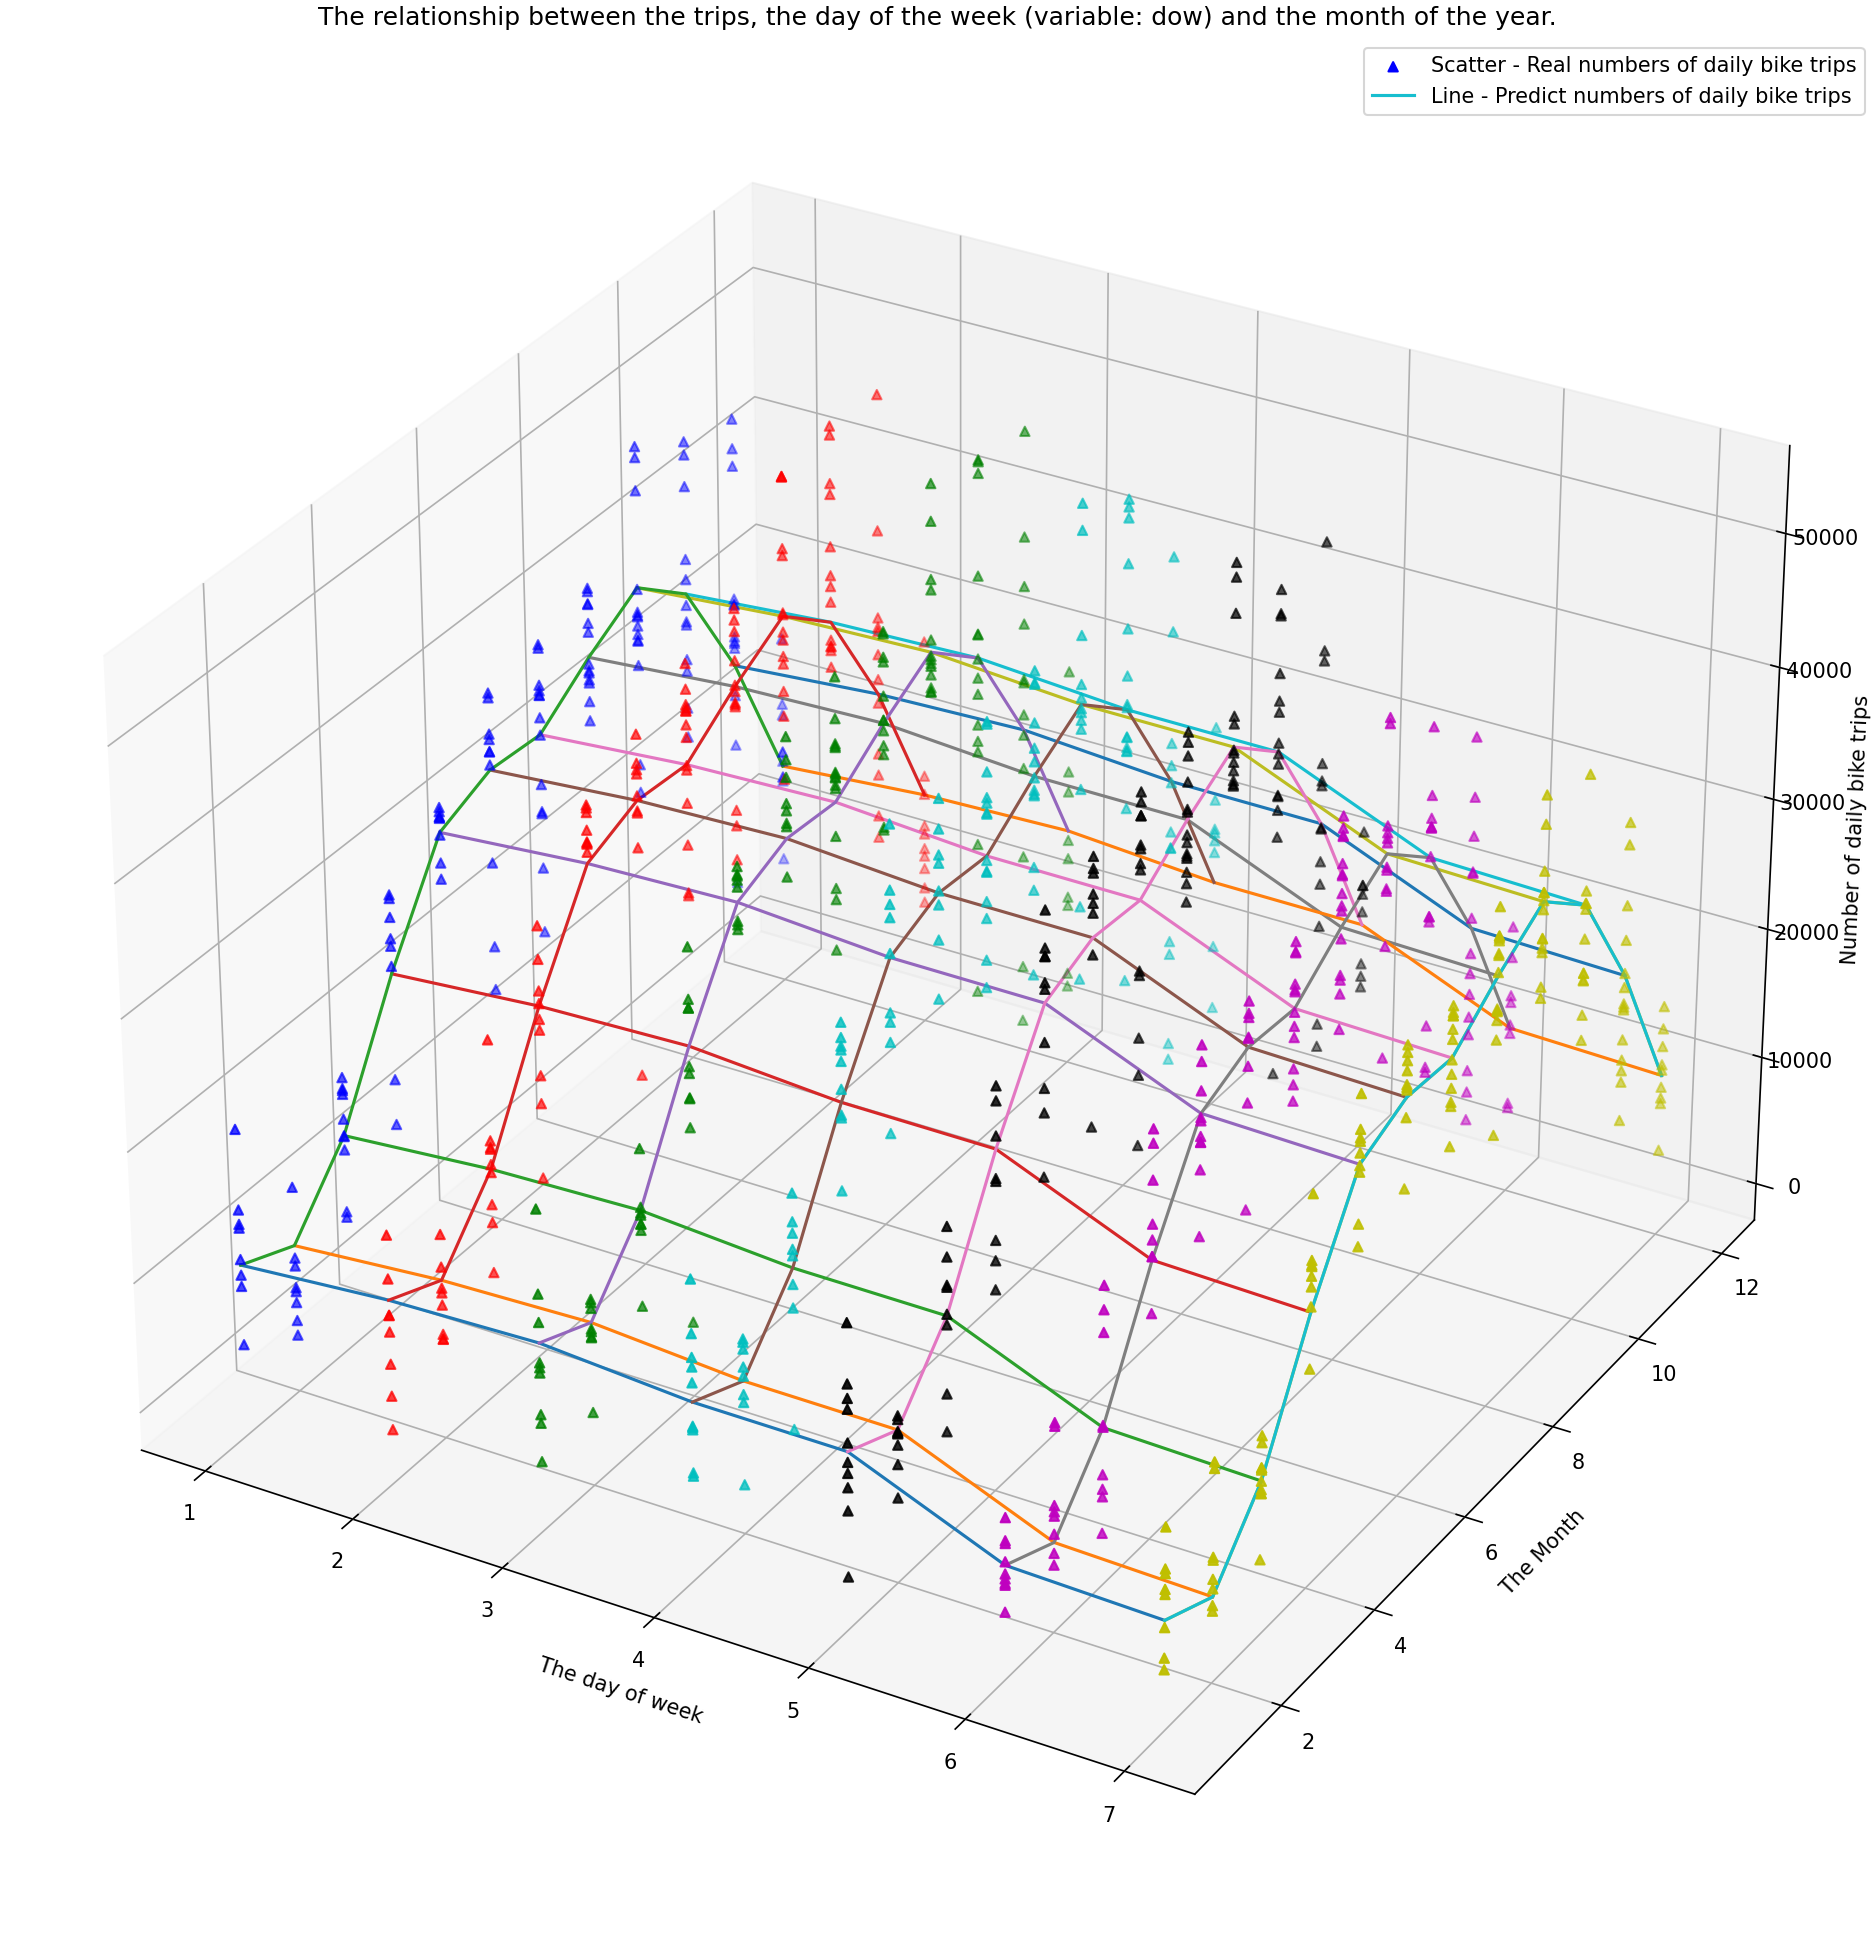

In [6]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt3
%matplotlib widget

fig = plt3.figure(figsize=(12.5, 13), dpi = 150)
ax = Axes3D(fig, auto_add_to_figure=False)
color = ['b', 'r', 'g', 'c', 'k', 'm', 'y']

X = df.dow.values
Y = df.month.values
Z = df.trips.values

Col = [color[X[i]-1] for i in range(len(X))]
ax.scatter(X, Y, Z, c = Col, marker='^', label='Scatter - Real numbers of daily bike trips')

for i in range(1, 13, 1):
    x1 = [k for k in range(1, 8, 1)]
    y1 = [i for k in range(1, 8, 1)]
    z1 = model.predict({"dow": x1, "month": y1})
    ax.plot(x1, y1, z1)

for i in range(1, 8, 1):
    x2 = [i for k in range(1, 13, 1)]
    y2 = [k for k in range(1, 13, 1)]
    z2 = model.predict({"dow": x2, "month": y2})
    ax.plot(x2, y2, z2)
    
ax.plot(x2, y2, z2, label='Line - Predict numbers of daily bike trips')

ax.set_xlabel('The day of week', size=10)  
ax.set_ylabel('The Month', size=10)  
ax.set_zlabel('Number of daily bike trips', size=10)
ax.grid(alpha=0.5)
fig.add_axes(ax)
ax.set_title("The relationship between the trips, the day of the week (variable: dow) and the month of the year.")
plt3.draw()
plt3.legend()
plt3.show()


The *lines* represent predicted **number of trips** under different the **day of the week** and **month of the year**. And the *triangle scatter* is the Real Values By visualizing the datal found that number of trips changes with the month with some regularity.

In [7]:

X_grid, Y_grid  = np.meshgrid([a for a in range(1, 8, 1)],
				   [a for a in range(1, 13, 1)])
Z_grid = []
for i in range(12):
    Z_grid.append(np.array(model.predict({"dow": X_grid[i], "month": Y_grid[i]})))

C:\Users\tnblt\AppData\Local\Temp\ipykernel_28428\1685531791.py:29: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  C = ax.contour(np.array(X_grid), np.array(Y_grid), np.array(Z_grid), zdir='z', offset=-50,color='black', linewidth=.5)


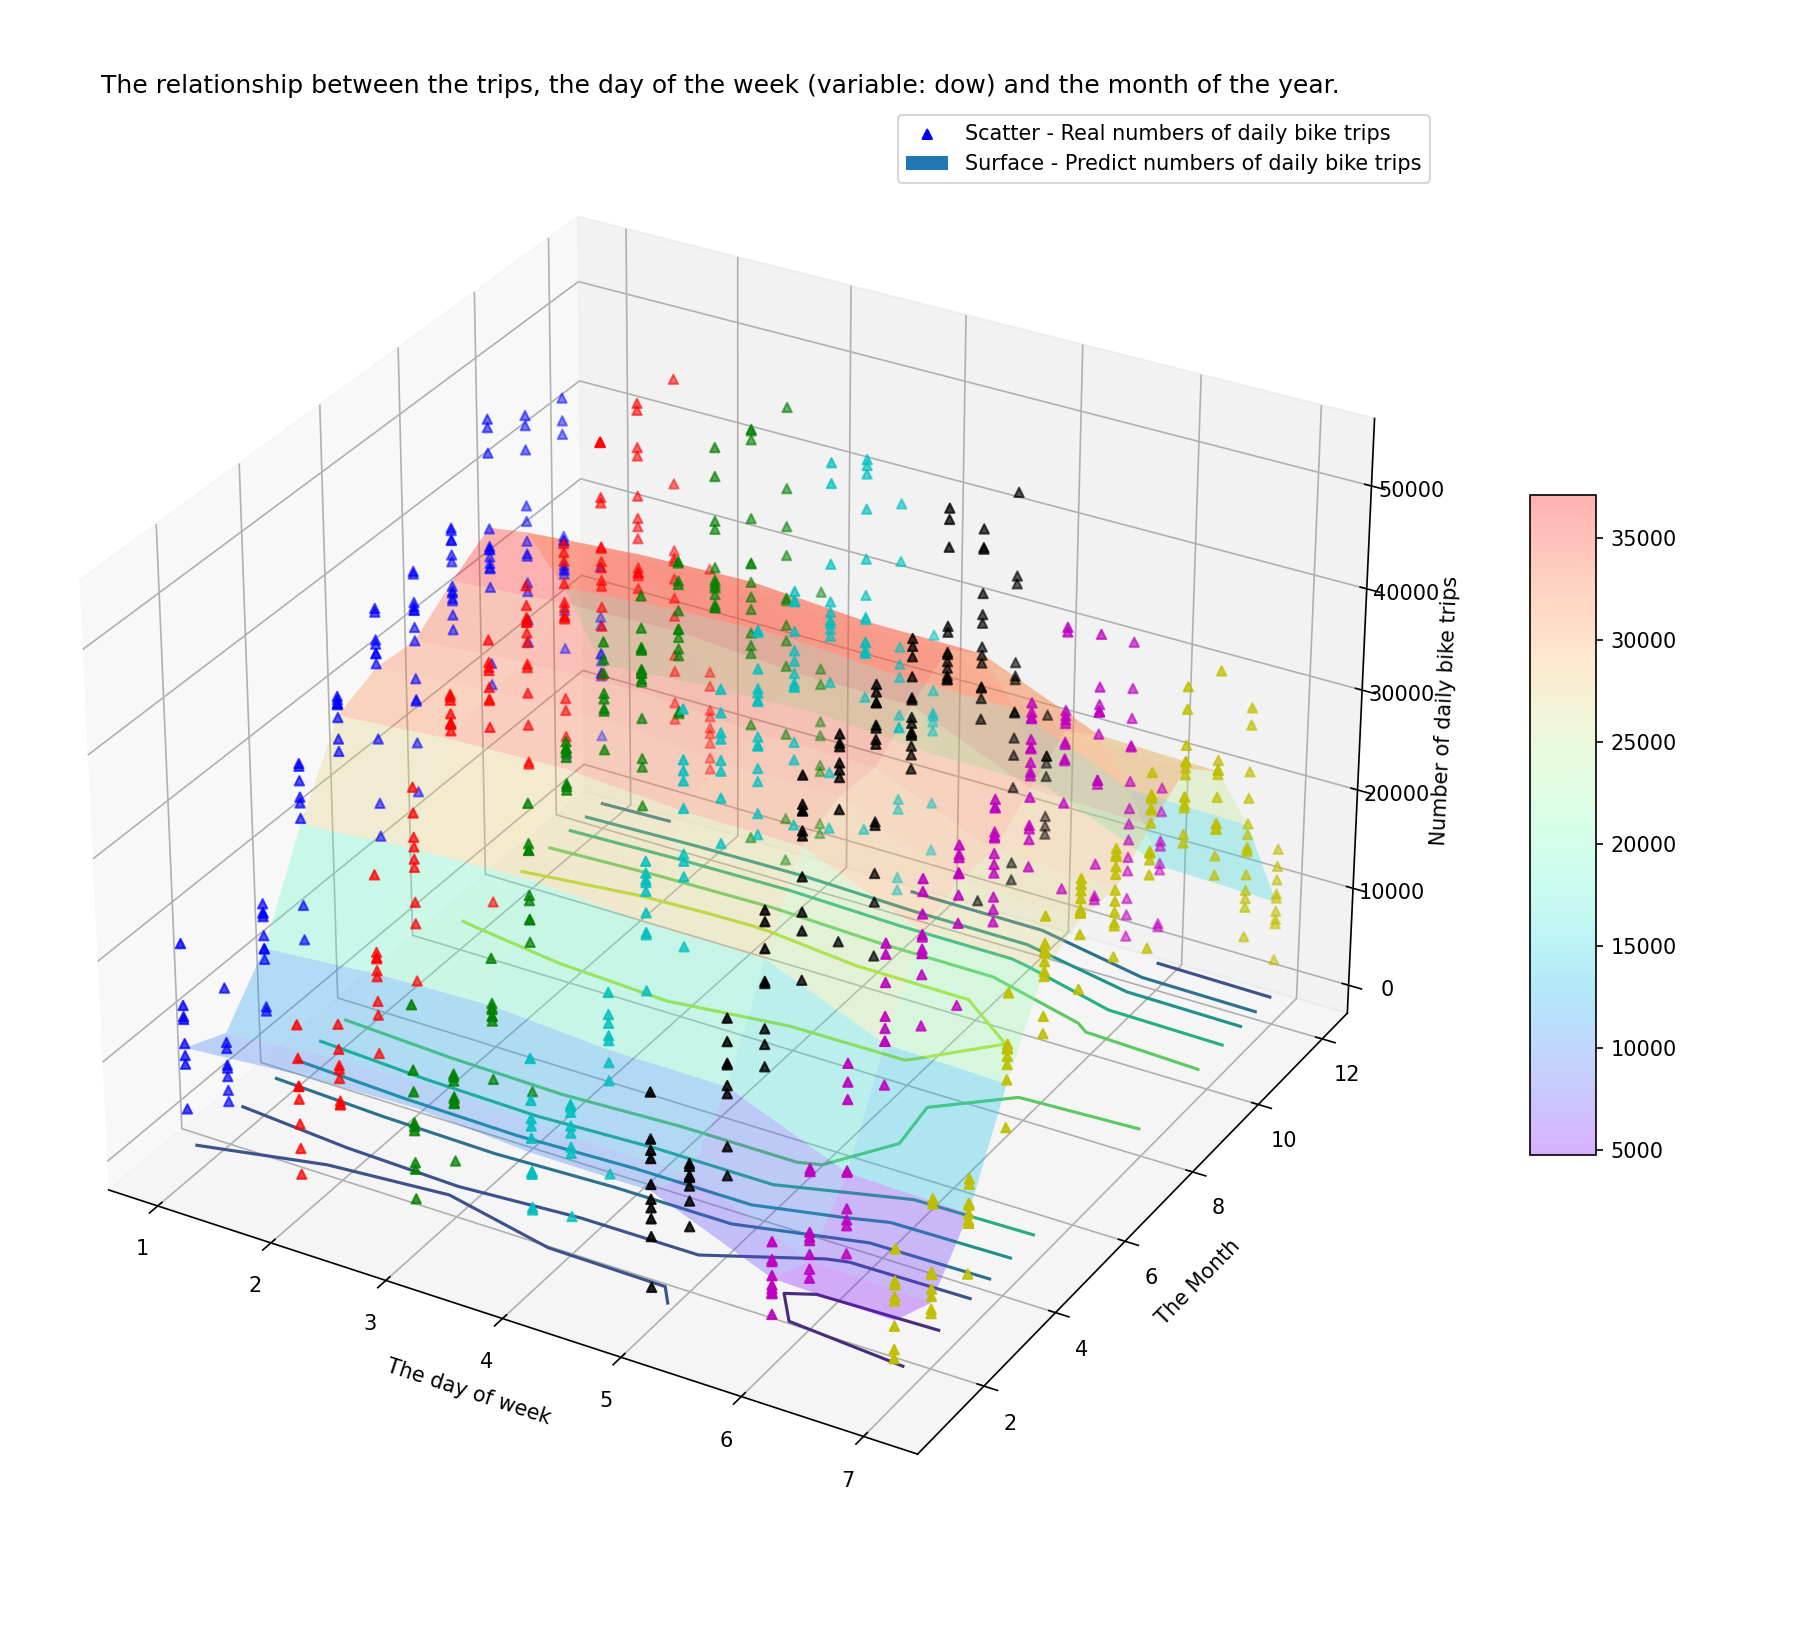

In [8]:
import matplotlib.pyplot as plt4

fig = plt4.figure(figsize=(12, 11), dpi = 150)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
color = ['b', 'r', 'g', 'c', 'k', 'm', 'y']

X = df.dow.values
Y = df.month.values
Z = df.trips.values

Col = [color[X[i]-1] for i in range(len(X))]
ax.scatter(X, Y, Z, c = Col, marker='^', label='Scatter - Real numbers of daily bike trips')
    
surf = ax.plot_surface(np.array(X_grid),
                       np.array(Y_grid), 
                       np.array(Z_grid), 
                       cmap=plt4.get_cmap('rainbow'), 
                       alpha=0.3,
                       linewidth=0.2, 
                       antialiased=True,
                       label='Surface - Predict numbers of daily bike trips')

surf._facecolors3d = surf._facecolors
surf._edgecolors3d = surf._edgecolors
surf._facecolors2d = surf._facecolors
surf._edgecolors2d = surf._edgecolors

C = ax.contour(np.array(X_grid), np.array(Y_grid), np.array(Z_grid), zdir='z', offset=-50,color='black', linewidth=.5)
ax.clabel(C, inline=True,fontsize=10)
ax.set_xlabel('The day of week', size=10)  
ax.set_ylabel('The Month', size=10)  
ax.set_zlabel('Number of daily bike trips', size=10)
fig.colorbar(surf, shrink=0.4, aspect=10)
ax.set_title("Number of daily bike trips")

ax.legend()
ax.set_title("The relationship between the trips, the day of the week (variable: dow) and the month of the year.")
plt4.draw()
#plt4.legend()
plt4.show()